Importing required packages and libraries

In [1]:
#Import preprocessing from sklearn to encode data
from sklearn import preprocessing

#Import libraries for processing csv data and downloading data
import csv, urllib.request

#import numpy
import numpy as np

#import classes from sklearn to calculate bayes and to split the dataset into test and train parts
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

#Import libraries and classes used to create plots and confusion matrices
from sklearn.metrics import confusion_matrix
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

As we are using the text values, to have a value out of it and for easier understanding, we are encoding each feature and label. To reiterate, we are assigning numerical value to each breed of dog, type of cancer, etc.

We are encoding the values from the specific rows, to have the numerical values

In [21]:
#create a new list
test_dataset_1=[0]
test_dataset_2=[0]

#set an url for the csv file and download it
url1 = 'http://moniak.me/agh/dataset/test_dataset_1.csv'
url2 = 'http://moniak.me/agh/dataset/test_dataset_2.csv'

response = urllib.request.urlopen(url1)
lines = [l.decode('utf-8') for l in response.readlines()]
cr = csv.reader(lines)

#iterate through all of the rows to add them to the test_dataset
for row in cr:
  test_dataset_1.append(row)
  #try to convert dogs age to float
  try:
    test_dataset_1[-1][2] = float(test_dataset_1[-1][2])
  except ValueError:
    continue

response = urllib.request.urlopen(url2)
lines = [l.decode('utf-8') for l in response.readlines()]
cr = csv.reader(lines)

#iterate through all of the rows to add them to the test_dataset
for row in cr:
  test_dataset_2.append(row)
  #try to convert dogs age to float
  try:
    test_dataset_2[-1][2] = float(test_dataset_2[-1][2])
  except ValueError:
    continue

#choose which dataset is used. Dataset 2 is larger, dataset 1 is smaller. 

choice = 2
if choice == 1:
  test_dataset = test_dataset_1
elif choice == 2:
  test_dataset = test_dataset_2

#instead of two pops we do it in one line
_, _, *test_dataset = test_dataset


age = [row[2] for row in test_dataset]
sex = [row[1] for row in test_dataset]
dog_type = [row[0] for row in test_dataset]
cancer_type = [row[-1] for row in test_dataset]

Create a fetures array, which will be the exact dataset we are comparing against.



In [19]:
encoder = preprocessing.LabelEncoder()

sex_encoded = encoder.fit_transform(sex)
dog_type_encoded = encoder.fit_transform(dog_type)
cancer_encoded = encoder.fit_transform(cancer_type)
age = [int(float(a)) for a in age]

features = np.vstack((dog_type_encoded, sex_encoded, age)).T

Below you can find the implementation of Gaussian Naive Bayes model. We have declared two functions - fit and predict, and two helper functions, that aren't used outside the class: _predict and _probabilitydensityfunction

function fit is used to fit the training data and the labels

In fit method, we need three values - mean, variance and priors. 

prior probability is a probablity distribution that express one's belief about this quantity without taking any of the evidence into the account. 

variance - squared deviation of a random variable

mean - arithmetic average

function predict, as name suggests, is used to predict test values agains the training data

In [11]:
class NaiveBayes:
  def fit(self, X, y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
    self._var = np.zeros((n_classes, n_features), dtype=np.float64)
    self._priors = np.zeros(n_classes, dtype=np.float64)

    for c in self._classes:
      X_c = X[c==y]
      self._mean[c,:] = X_c.mean(axis=0) 
      self._var[c,:] = X_c.var(axis=0) 
      self._priors[c] = X_c.shape[0] / float(n_samples)


  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return y_pred

  def _predict(self, x):
    posteriors = []

    for idx, c in enumerate(self._classes):
      prior = np.log(self._priors[idx])
      class_conditional = np.sum(np.log(self._probabilitydensityfunction(idx, x)))
      posterior = prior + class_conditional

      #Print posteriors to have greater understanding of inner calculations
      #print(posterior)

      posteriors.append(posterior)
    return self._classes[np.argmax(posteriors)]

  
  def _probabilitydensityfunction(self, class_idx, x):
    mean = self._mean[class_idx]
    variance = self._var[class_idx]
    numerator = np.exp(- (x-mean)**2 / (2 * variance))
    denominator = np.sqrt(2 * np.pi * variance)
    return numerator/denominator


Function accuracy is used to compare the predicted results against test results, and return them in form of percentage

In [10]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy


Splitting the entire dataset into four parts:


*   X_train - features used to train the algorithm
*   X_test - features used to test the algorithm
*   y_train - labels used to train the algorithm
*   y_test - lables used to test the algorithm



In [15]:
X = features
cancer_encoded = encoder.fit_transform(cancer_type)
y = np.array(cancer_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Using the Gaussian Naive Bayes model from SKLearn

In [6]:
model = GaussianNB()
model.fit(X_train, y_train)
testValLabel = model.predict(X_test)
accuracy(testValLabel, y_test)

0.6842105263157895

Using the Multinomial Naive Bayes model from SKLearn

In [7]:

model = MultinomialNB()
model.fit(X_train, y_train)
testValLabel = model.predict(X_test)
accuracy(testValLabel, y_test)

0.5789473684210527

Using the Complement Naive Bayes model from SKLearn

In [8]:

model = ComplementNB()
model.fit(X_train, y_train)
testValLabel = model.predict(X_test)
accuracy(testValLabel, y_test)

0.543859649122807

Using the Bernoulli Naive Bayes model from SKLearn

In [9]:

model = BernoulliNB()
model.fit(X_train, y_train)
testValLabel = model.predict(X_test)
accuracy(testValLabel, y_test)

0.2982456140350877

Using the Gaussian Naive Bayes implementation created in class NaiveBayes

In [16]:

model = NaiveBayes()
model.fit(X_train, y_train)
testValLabel = model.predict(X_test)
accuracy(testValLabel, y_test)

3


0.7017543859649122

Creating confusion matrix, and then plotting it in a figure

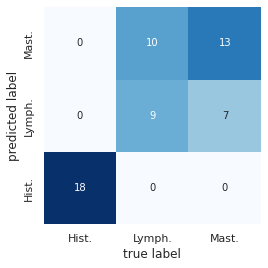

In [17]:

mat = confusion_matrix(testValLabel, y_test)
label_names = ['Hist.', 'Lymph.', 'Mast.']
hmap = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels = label_names, yticklabels = label_names, cmap="Blues")
hmap.invert_yaxis()
plt.xlabel('true label')
plt.ylabel('predicted label');

fig = hmap.get_figure() #i te dwie linijki na końcu ADRIAN
fig.savefig('fig.pdf')